<a href="https://colab.research.google.com/github/MUbarak123-56/animal-recognition/blob/master/model_training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.0 MB/s 
     |████████████████████████████████| 120 kB 59.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 


In [5]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [6]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 4.0 MB/s 
     |████████████████████████████████| 1.3 MB 49.5 MB/s 
     |████████████████████████████████| 431 kB 59.2 MB/s 
     |████████████████████████████████| 212 kB 51.0 MB/s 
     |████████████████████████████████| 115 kB 52.4 MB/s 
     |████████████████████████████████| 127 kB 52.1 MB/s 
Mounted at /content/gdrive


In [7]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [8]:
from transformers import pipeline

In [44]:
path = Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10')

In [45]:
fns = get_image_files(path)
fns

(#26179) [Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mrKyPYWVl9Psf8Dc_2f_NwHaFN.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mrcAcvmhFZQ7F1aVtiKjpQHaE8.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mtcIhX8yPosJtN7YR0yauAHaE6.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mtdnqll_AgymcZ_xKi5yAwHaEm.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mtjp2wVGxWVDDkV8oRrnrAHaNL.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-muFCGG6Qau1iKG9UZIk3SQHaFA.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-muLqP01O3slF7b4lpq00JgHaE8.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mvV8VBNi5a7RQ3gUstuzGwHaF7.jpeg'),Path('/content/gdrive/MyDrive/GitHub/animal-project/data/animals-10/cane/OIP-mv_CSd91UrAD6EljvUr0fwHaF

In [65]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [66]:
dls = pic.dataloaders(path)

In [67]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

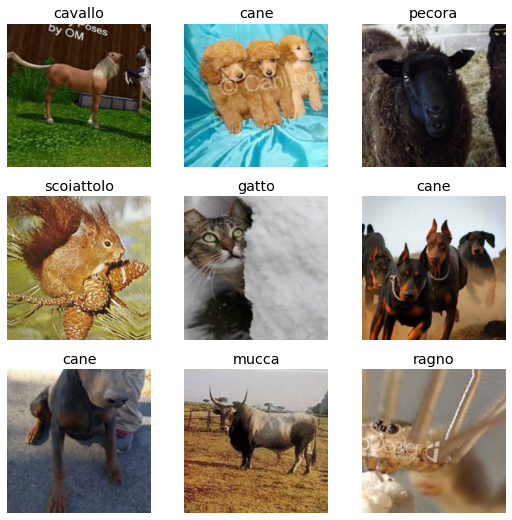

In [68]:
#dls = ImageDataLoaders.from_name_func(path, fnames = get_image_files(path), valid_pct=0.2, label_func=lambda x: x[0].isupper(),item_tfms=Resize(224))
dls.show_batch()

In [69]:
learn50 = cnn_learner(dls, resnet50, metrics=error_rate)
learn50.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored

In [ ]:
actual_label = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}